In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import country_converter as coco

In [2]:
df = pd.read_csv('data/ds_salaries.csv')

In [3]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
for i in df.columns:
    print(f"{i} has {df[i].duplicated().sum()} Duplicate values")

work_year has 3751 Duplicate values
experience_level has 3751 Duplicate values
employment_type has 3751 Duplicate values
job_title has 3662 Duplicate values
salary has 2940 Duplicate values
salary_currency has 3735 Duplicate values
salary_in_usd has 2720 Duplicate values
employee_residence has 3677 Duplicate values
remote_ratio has 3752 Duplicate values
company_location has 3683 Duplicate values
company_size has 3752 Duplicate values


In [6]:
df.shape

(3755, 11)

In [7]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [8]:
categorical_columns = []
numerical_columns = []
for i in df.columns:
    if df[i].dtype=='O':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
print(f"Categorical Columns are : {categorical_columns}")
print(f"Numberical Columns are : {numerical_columns}")

Categorical Columns are : ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
Numberical Columns are : ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']


In [9]:
for i in categorical_columns:
    print(f"No. of categorical values in {i} are {len(df[i].value_counts())}")

No. of categorical values in experience_level are 4
No. of categorical values in employment_type are 4
No. of categorical values in job_title are 93
No. of categorical values in salary_currency are 20
No. of categorical values in employee_residence are 78
No. of categorical values in company_location are 72
No. of categorical values in company_size are 3


Text(0.5, 1.0, 'Employees Based on Experience')

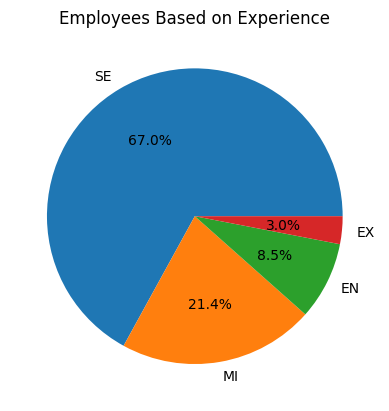

In [10]:
ex_level = df['experience_level'].value_counts()
fig = plt.pie(ex_level,labels=ex_level.index,autopct='%1.1f%%')
plt.title("Employees Based on Experience")

In [11]:
top15_job_titles = df['job_title'].value_counts()[:15]
values = top15_job_titles.values
index_job = top15_job_titles.index

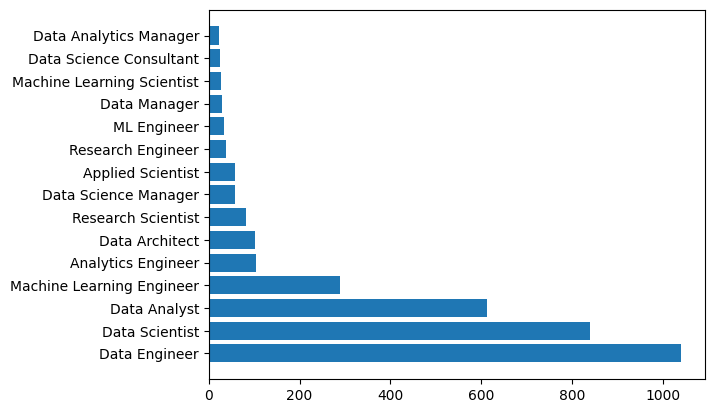

In [12]:
fig, ax = plt.subplots()
bars = ax.barh(index_job, values,align='center')

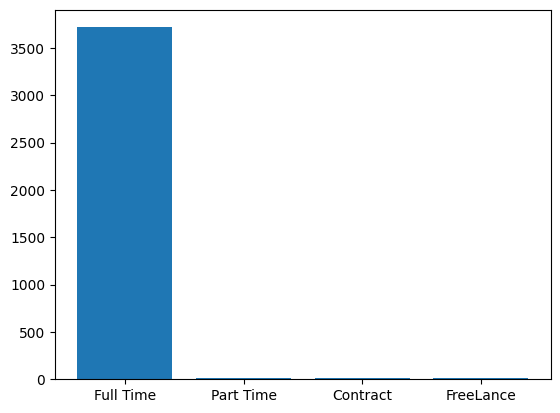

In [13]:
emp_type = df['employment_type'].value_counts()
emp_type_name = ['Full Time', 'Part Time', 'Contract', 'FreeLance']
fig, ax = plt.subplots()
bar = ax.bar(emp_type_name,emp_type)

In [16]:
country = coco.convert(names=df['employee_residence'], to='ISO3')
df['employee_residence'] = country
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ESP,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,USA,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,USA,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CAN,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CAN,100,CA,M
